In [2]:
%matplotlib inline
# See all the "as ..." contructs? They're just aliasing the package names.
# That way we can call methods like plt.plot() instead of matplotlib.pyplot.plot().
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
import dask.dataframe as db
from sqlalchemy import create_engine
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
plt.style.use("ggplot")

In [3]:
columns = ['Advertiser ID',
 'Line Item Type',
 'Creative Type',
 'Creative Height',
 'Creative Width',
 'Date',
 'Time of Day',
 'Device Type',
 'Operating System',
 'Region',
 'City',
 'DV360 Activity',
 'Exchange',
 'App/URL',
 'Impressions',
 'Clicks',
 'Revenue (Adv Currency)',
 'Post-Click Conversions',
 'Post-View Conversions',
 'Active View: Viewable Impressions',
 'First-Quartile Views (Video)',
 'Third-Quartile Views (Video)',
 'Midpoint Views (Video)',
 'Complete Views (Video)',
 'Layer',
 'Channel',
 'Behaviour']

# Starting the Project
What question do I want to answer? _"What are the best recommendations I can make, learning from historical data to improve on future campaigns?"_

# Exploratory Data Analysis 
EDA is used to explore the target and features so we know if we will need to transform or normalize some of the features based on their distribution. 
**_Or delete some features since it might not give me any information in predicting future outcomes, or create new features that might be useful for prediction_**. 


## Basic EDA workflow
(From the lecture, repeated here for convenience).

The basic workflow is as follows:

1. Build a DataFrame from the data (ideally, put all data in this object)
2. Clean the DataFrame. It should have the following properties:
    - Each row describes a single object
    - Each column describes a property of that object
    - Columns are numeric whenever appropriate
    - Columns contain atomic properties that cannot be further decomposed
3. Explore global properties. Use histograms, scatter plots, and aggregation functions to summarize the data.
    - Getting the dataset using a few "global property" visualizations, illustrating histograms with both linear and log scales. 
4. Explore group properties. Use groupby and small multiples to compare subsets of the data.

This process transforms your data into a format which is easier to work with, gives you a basic overview of the data's properties, and likely generates several questions for you to followup in subsequent analysis.

## Loading and Cleaning with Pandas

In [16]:
data_type = dtype={'Creative Height': 'object',
       'Creative ID': 'object',
       'Creative Width': 'object',
       'City ID': 'object'}

df = pd.read_csv("../../Desktop/DataFile-chunk_0.csv",usecols=columns,
                 dtype=data_type,index_col=0,encoding='utf-8',
                 parse_dates=['Date'])

In [17]:
df.head()

,Line Item Type,Creative Type,Creative Height,Creative Width,Date,Time of Day,Device Type,Operating System,Region,City,DV360 Activity,Exchange,App/URL,Impressions,Clicks,Revenue (Adv Currency),Post-Click Conversions,Post-View Conversions,Active View: Viewable Impressions,First-Quartile Views (Video),Third-Quartile Views (Video),Midpoint Views (Video),Complete Views (Video),Layer,Channel,Behaviour
Advertiser ID,,,,,,,,,,,,,,,,,,,,,,,,,,
3384832,Real-time bidding,Standard,250,300,2018-10-25,16,Desktop,Macintosh,New South Wales,Sydney,Total,PubMatic,mail.yahoo.com,4,0,0.015509,0.0,0.0,2,0,0,0,0,AW,D,PT
3384832,Real-time bidding,Standard,250,300,2018-10-25,16,Desktop,Windows 10,New South Wales,Sydney,Total,Rubicon,independent.co.uk,1,0,0.006772,0.0,0.0,0,0,0,0,0,AW,D,PT
3384832,Real-time bidding,Standard,250,300,2018-10-25,17,Desktop,Macintosh,New South Wales,Sydney,Total,DoubleClick Ad Exchange,nfl.com,1,0,0.007226,0.0,0.0,1,0,0,0,0,AW,D,PT
3384832,Real-time bidding,Standard,250,300,2018-10-25,17,Desktop,Windows 10,New South Wales,Sydney,Total,DoubleClick Ad Exchange,allrecipes.com,2,0,0.011810,0.0,0.0,2,0,0,0,0,AW,D,PT
3384832,Real-time bidding,Standard,250,300,2018-10-25,17,Desktop,Windows 10,New South Wales,Sydney,Total,DoubleClick Ad Exchange,linkedin.com,8,0,0.043227,0.0,0.0,6,0,0,0,0,AW,D,PT


### Cleaning: Examining the DataFrame - Quick Checks 
Trying to examine the dataframe to get overall sense of the content

In [18]:
#Checking column datatypes
######
df.dtypes
######

Line Item Type                               object
Creative Type                                object
Creative Height                              object
Creative Width                               object
Date                                 datetime64[ns]
Time of Day                                   int64
Device Type                                  object
Operating System                             object
Region                                       object
City                                         object
DV360 Activity                               object
Exchange                                     object
App/URL                                      object
Impressions                                   int64
Clicks                                        int64
Revenue (Adv Currency)                      float64
Post-Click Conversions                      float64
Post-View Conversions                       float64
Active View: Viewable Impressions             int64
First-Quarti

## Shape of Dataset
Checking the dimensions of the table to see each row representing an observation and each column representing the information (variable). 

In [19]:
print("The number of rows in this dataset is: {}".format(df.shape[0]))
print("The number of feature/columns in this dataset is: {}".format(df.shape[1]))
print('\n')
print("Columns in this data are: ", df.columns.tolist())

The number of rows in this dataset is: 1000000
The number of feature/columns in this dataset is: 26


Columns in this data are:  ['Line Item Type', 'Creative Type', 'Creative Height', 'Creative Width', 'Date', 'Time of Day', 'Device Type', 'Operating System', 'Region', 'City', 'DV360 Activity', 'Exchange', 'App/URL', 'Impressions', 'Clicks', 'Revenue (Adv Currency)', 'Post-Click Conversions', 'Post-View Conversions', 'Active View: Viewable Impressions', 'First-Quartile Views (Video)', 'Third-Quartile Views (Video)', 'Midpoint Views (Video)', 'Complete Views (Video)', 'Layer', 'Channel', 'Behaviour']


Checking to see if data was read correctly and values represented as I'm expected. 

I noticed `Creative Height` and `Creative Width` are objects instead of ints

In [20]:
#Converting creative height to numeric value
#df['Creative Height'] = pd.to_numeric(df['Creative Height'],errors='coerce')
#df['Creative Width'] = pd.to_numeric(df['Creative Width'],errors='coerce')

#print(df['Creative Height'].dtypes)
#print(df['Creative Width'].dtypes)

### Cleaning: Examining the Dataframe - Deeper Look
Checking to see if there are any missing values in the dataframe. 

As seen below, I tried to convert to the type I expect the column to be but something went horribly wrong meaning my data is bad as seen below

In [21]:
#no missing values
#np.sum(df.isnull())

In [22]:
#df[df["Creative Height"].isnull()]

### Cleaning: Dealing with Missing Values
One approach is to simply exclude them from the data frame. Is this appropriate for all 'missing'or 'invalid values? How would I drop these values from the dataframe i.e. _is it possible to eliminate just a single entry in my dataset? Should I eliminate an entire row or column?

In [23]:
#Treating missing or invalid values in dataframe
#df= df[df['Creative Height'].notnull()]
#df=df[df['Creative Width'].notnull()]

In [24]:
df.dtypes

Line Item Type                               object
Creative Type                                object
Creative Height                              object
Creative Width                               object
Date                                 datetime64[ns]
Time of Day                                   int64
Device Type                                  object
Operating System                             object
Region                                       object
City                                         object
DV360 Activity                               object
Exchange                                     object
App/URL                                      object
Impressions                                   int64
Clicks                                        int64
Revenue (Adv Currency)                      float64
Post-Click Conversions                      float64
Post-View Conversions                       float64
Active View: Viewable Impressions             int64
First-Quarti

In [25]:
#print(np.sum(df['Creative Height'].isnull()))
#print(np.sum(df['Creative Width'].isnull()))
#df.shape

Fixing further those types, I'm hoping there's no errors when converting:

In [27]:
#df['Creative Height'] = df['Creative Height'].astype(int)
#df["Creative Width"] = df['Creative Width'].astype(int)

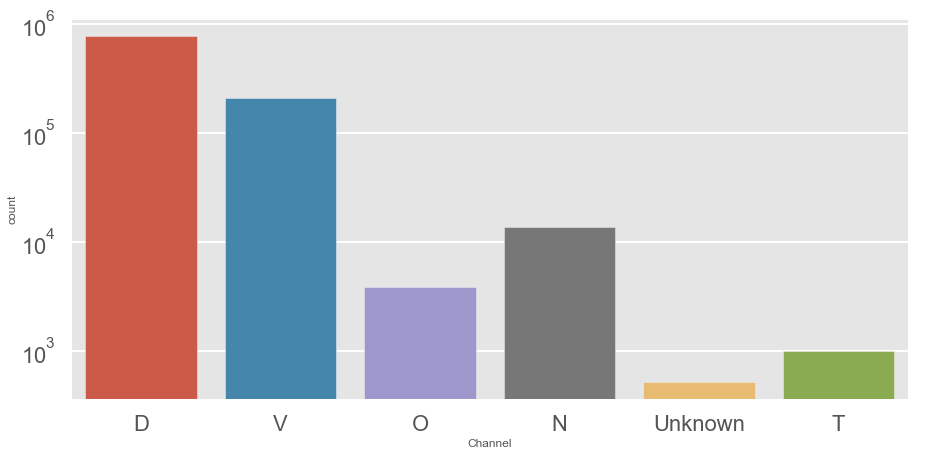

In [29]:
plt.figure(1,figsize=(15,7))
sns.countplot(x='Channel',data=df,log=True)
plt.show()

## Comparison of Channels on Spend vs Conversions

Would like to see which channel and their associated spend ratios and do a comparison plot to see how much conversions each channels are getting.

Looks like spend is very concentrated and high for `V` and `T` compared to the rest however it looks like `D`, `V` and `N` channels are getting the most conversions. Probably, these plots give some insight putting less budget into less-converted channels and more into converted-channels. 

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


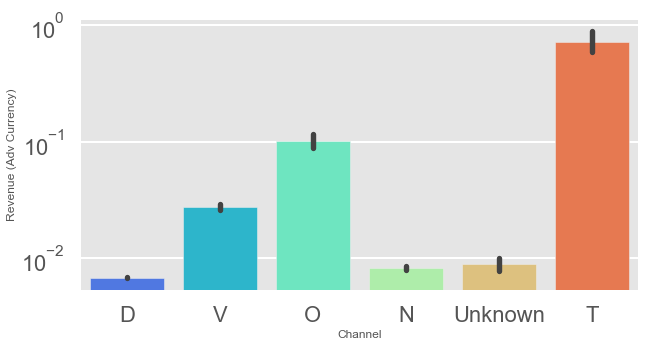

In [32]:
#Finding how much money is spent per channel
plt.figure(1,figsize=(10,5))
sns.barplot(x='Channel',y='Revenue (Adv Currency)',data=df,palette='rainbow',log=True)
plt.show()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


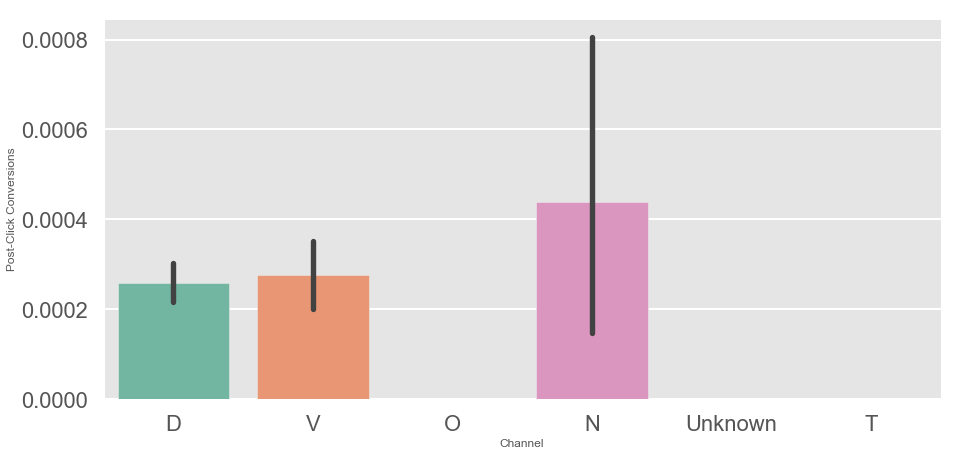

In [33]:
#Comparing plots to see how much conversions is happening between channels
plt.figure(1,figsize=(15,7))
sns.barplot(x='Channel',y='Post-Click Conversions',data=df,palette='Set2')
plt.show()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


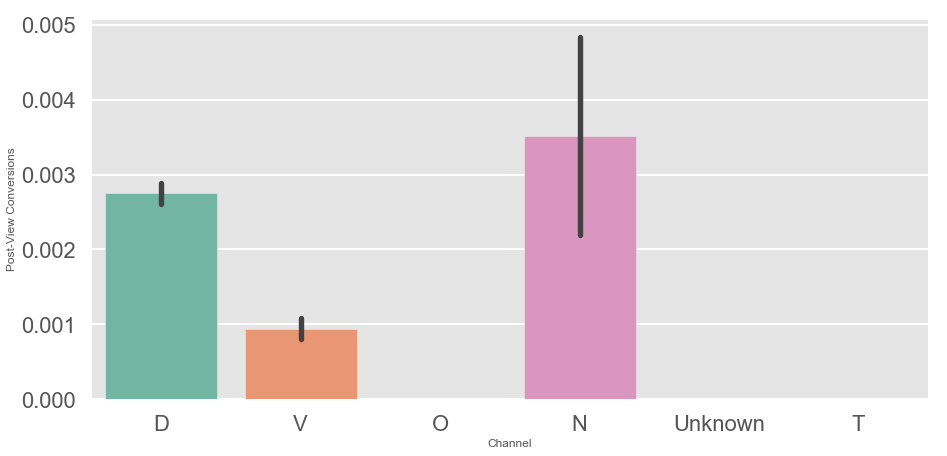

In [34]:
##Is it any different for post-view conversions?
plt.figure(1,figsize=(15,7))
sns.barplot(x='Channel',y='Post-View Conversions',data=df,palette='Set2')
plt.show()

## Awareness Channel
The `V` channel is excellent in putting more money to raise awareness about the advertising products. 

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


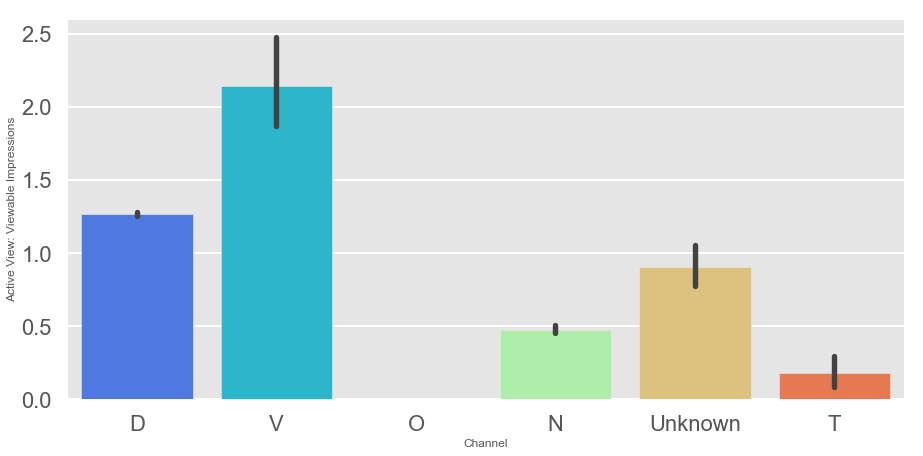

In [35]:
#Looks like social media is a good channel thats getting much more viewable impressions (seen ads) with 
#display ads coming in a close second
plt.figure(1,figsize=(15,7))
sns.barplot(x='Channel',y='Active View: Viewable Impressions',data=df,palette='rainbow')
plt.show()

## Distribution of Variables
What do the variables look like? For example, are they numerical or categorical data. If they are numerical, what are their distribution; if they are categorical, how many are they in different categories?
- Make **HISTOGRAMS FOR NUMERICAL VARIABLES** and **BARPLOTS FOR CATEGORICAL VARIABLES**. 
- Check for missing values for the variables by looking at the **count** row and comparing it to **data.shape**. 

### Histograms of Numerical Variables

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


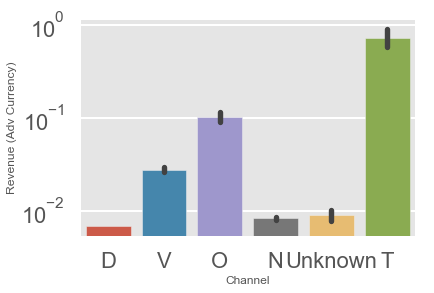

In [40]:
#Would like to see how revenue spend changes upon channel 
sns.barplot(x='Channel',y='Revenue (Adv Currency)',data=df,estimator=np.mean,log=True)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


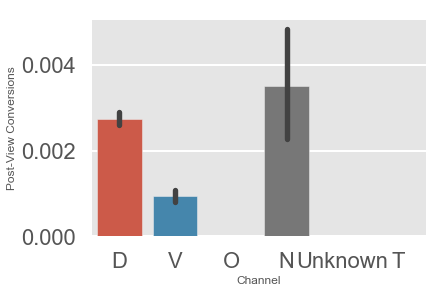

In [39]:
sns.barplot(x='Channel',y='Post-View Conversions',data=df,estimator=np.mean)

## Extracting Features from Date Column

In [44]:
#Extracting elements from date columns
df['Year'] = pd.DatetimeIndex(df['Date']).year
#Creating month column 
df['Month'] = pd.DatetimeIndex(df['Date']).month
#Creating day column
df['Day'] = pd.DatetimeIndex(df['Date']).day
df.head()

,Line Item Type,Creative Type,Creative Height,Creative Width,Date,Time of Day,Device Type,Operating System,Region,City,DV360 Activity,Exchange,App/URL,Impressions,Clicks,Revenue (Adv Currency),Post-Click Conversions,Post-View Conversions,Active View: Viewable Impressions,First-Quartile Views (Video),Third-Quartile Views (Video),Midpoint Views (Video),Complete Views (Video),Layer,Channel,Behaviour,Year,Month,Day
Advertiser ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3384832,Real-time bidding,Standard,250,300,2018-10-25,16,Desktop,Macintosh,New South Wales,Sydney,Total,PubMatic,mail.yahoo.com,4,0,0.015509,0.0,0.0,2,0,0,0,0,AW,D,PT,2018,10,25
3384832,Real-time bidding,Standard,250,300,2018-10-25,16,Desktop,Windows 10,New South Wales,Sydney,Total,Rubicon,independent.co.uk,1,0,0.006772,0.0,0.0,0,0,0,0,0,AW,D,PT,2018,10,25
3384832,Real-time bidding,Standard,250,300,2018-10-25,17,Desktop,Macintosh,New South Wales,Sydney,Total,DoubleClick Ad Exchange,nfl.com,1,0,0.007226,0.0,0.0,1,0,0,0,0,AW,D,PT,2018,10,25
3384832,Real-time bidding,Standard,250,300,2018-10-25,17,Desktop,Windows 10,New South Wales,Sydney,Total,DoubleClick Ad Exchange,allrecipes.com,2,0,0.011810,0.0,0.0,2,0,0,0,0,AW,D,PT,2018,10,25
3384832,Real-time bidding,Standard,250,300,2018-10-25,17,Desktop,Windows 10,New South Wales,Sydney,Total,DoubleClick Ad Exchange,linkedin.com,8,0,0.043227,0.0,0.0,6,0,0,0,0,AW,D,PT,2018,10,25


#### Comparison of Spend and Conversions through Days 

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


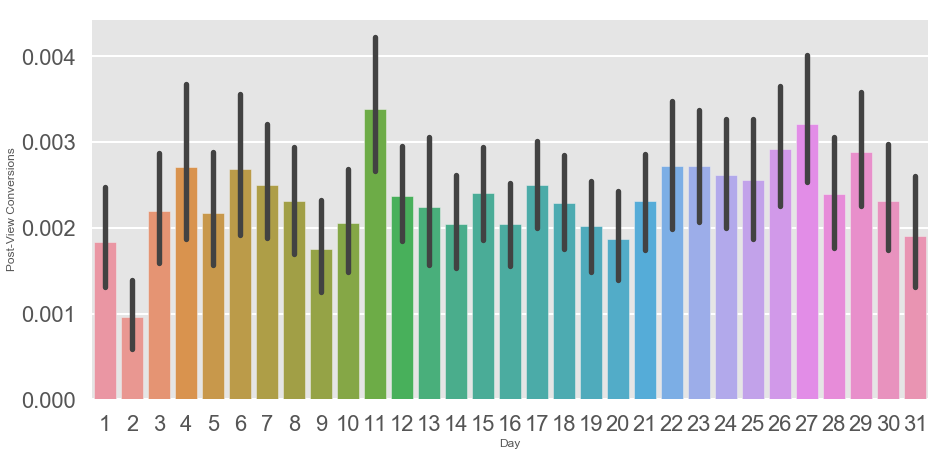

In [45]:
#Would like to see how revenue spend changes upon time 
plt.figure(figsize=(15,7))
sns.barplot(x='Day',y='Post-View Conversions',data=df)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


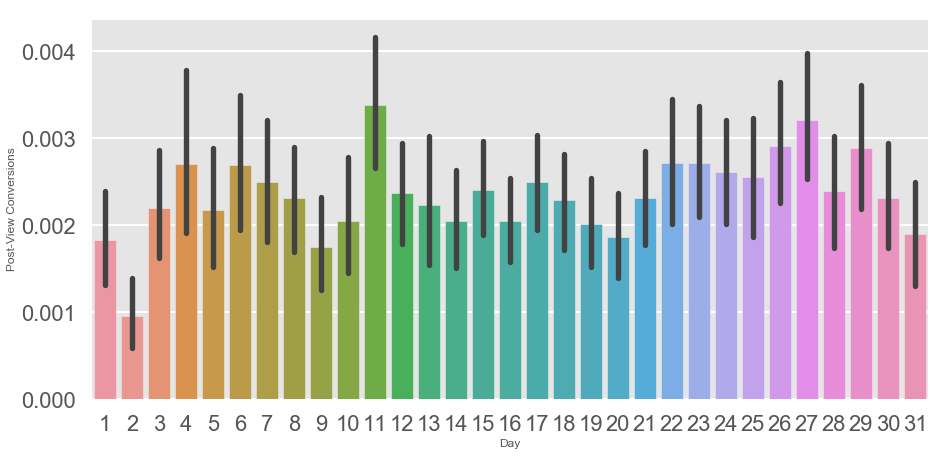

In [46]:
plt.figure(figsize=(15,7))
sns.barplot(x='Day',y='Post-View Conversions',data=df)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


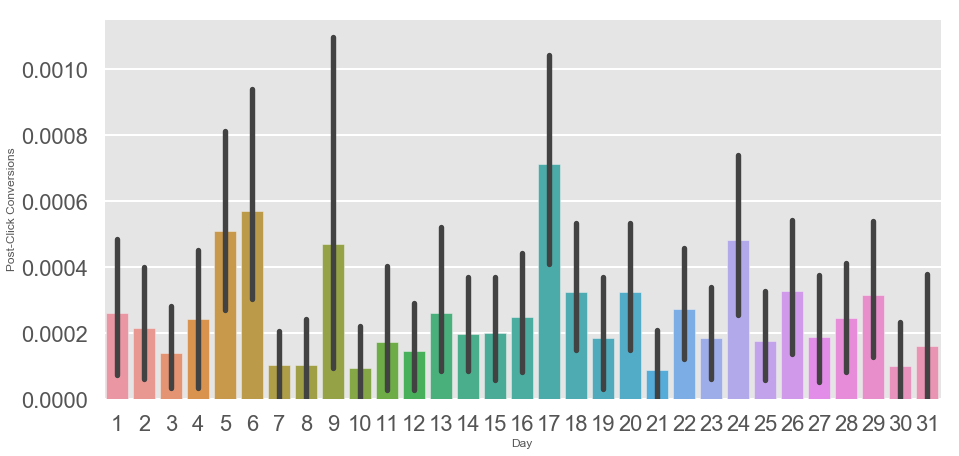

In [47]:
plt.figure(figsize=(15,7))
sns.barplot(x='Day',y='Post-Click Conversions',data=df)

#### Comparison of Spend and Conversions through Days 

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


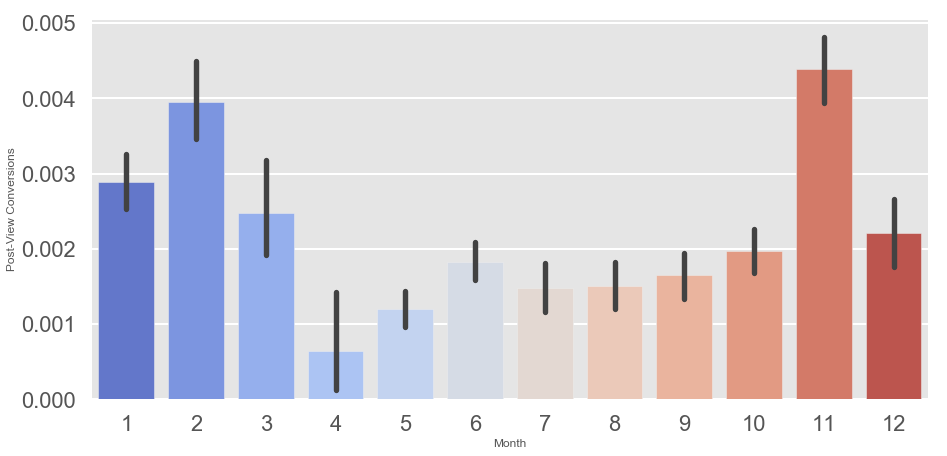

In [48]:
plt.figure(figsize=(15,7))
sns.barplot(x='Month',y='Post-View Conversions',data=df,palette='coolwarm')

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


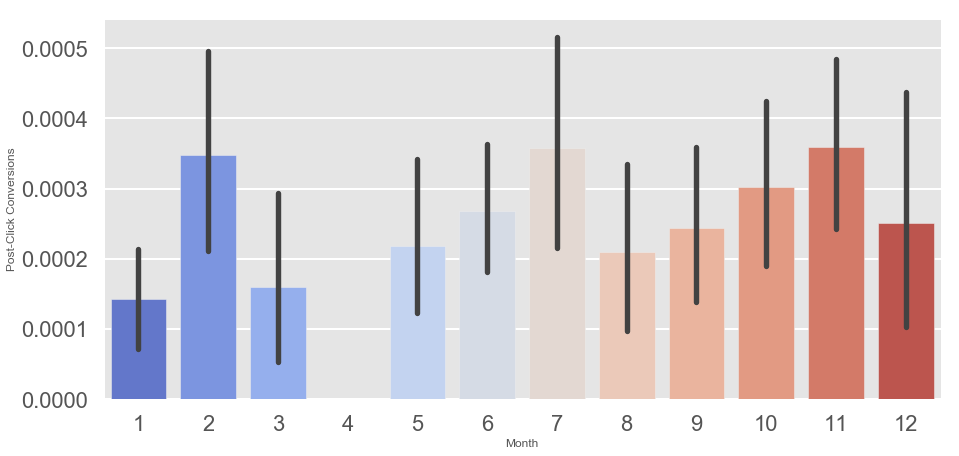

In [49]:
plt.figure(figsize=(15,7))
sns.barplot(x='Month',y='Post-Click Conversions',data=df,palette='coolwarm')

## Conversions = Post-Click + Post-View
Creating a separate column to combine the conversions to observe the performance easily of each campaign. 

In [53]:
df['Conversions'] = df['Post-Click Conversions']+ df['Post-View Conversions']
df['Conversions'].value_counts()

0.0     997707
1.0       2093
2.0        130
3.0         34
4.0         20
5.0         10
6.0          3
8.0          2
10.0         1
Name: Conversions, dtype: int64

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


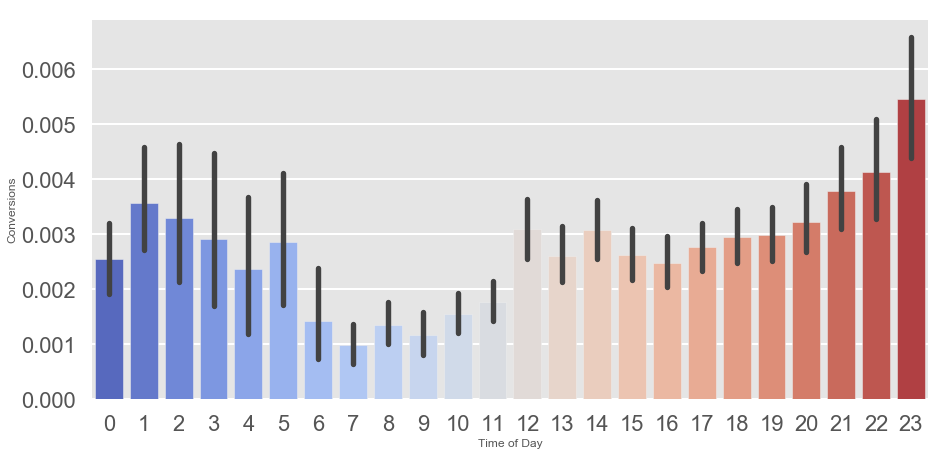

In [54]:
plt.figure(figsize=(15,7))
sns.barplot(x='Time of Day',y='Conversions',data=df,palette='coolwarm')

# Feature Engineering 
In the feature selection and feature engineering step, you might need to delete some features or add some new features. After you decide the features you want to feed into the model, you can start training your models. Some general things you can do is:
1. Dropping features we won't use
2. Filling in missing values
3. Log transformations
- Check histograms to look at distributions of variables. If it is **highly right-skewed**, should use **_log transformations_** so skewness will be less. 

In [55]:
#Function for other files in filling missing value with median values
#Can use this when other chunk files do have missing values
def fill_na_median(data,inplace=True):
    return data.fill_na(data.median(),inplace=inplace)


In [56]:
#Log transformations

#Some data in the the dataset is highly skewed right (data on left)
def log_transformation(data):
    return data.apply(np.log1p)

### Parsing and Completing Dataframe
Need the website's name to proceed by parsing the 'App/URL' column by using panda's map or panda's apply to assign new columns to the dataframe. 

In [57]:
#Function that accepts app url and returns the website's name 
def get_website(url):
    website = url.split(".")[0]
    ####
    return website

#Apply the get_website function to 'App/URL' column using '.apply' or '.map'
#And add a new column 'website' to store the names 
df['Website'] = df['App/URL'].apply(lambda x: get_website(x))
df['Website'][0:10]

Advertiser ID
3384832             mail
3384832      independent
3384832              nfl
3384832       allrecipes
3384832         linkedin
3384832             mail
3384832             mail
3384832         inquirer
3384832      theguardian
3384832    howstuffworks
Name: Website, dtype: object

## Encoding Categorical Features
I will use One Hot Encoding on the categorical features to transform them into numbers. 

Example code on categorising data:
```python
# get the categorical data
cat_features = ['Pclass', 'Sex', "Embarked"]
data_cat = data[cat_features]
data_cat = data_cat.replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}})
# One Hot Encoding 
data_cat_dummies = pd.get_dummies(data_cat)
# check the data
data_cat_dummies.head()
```

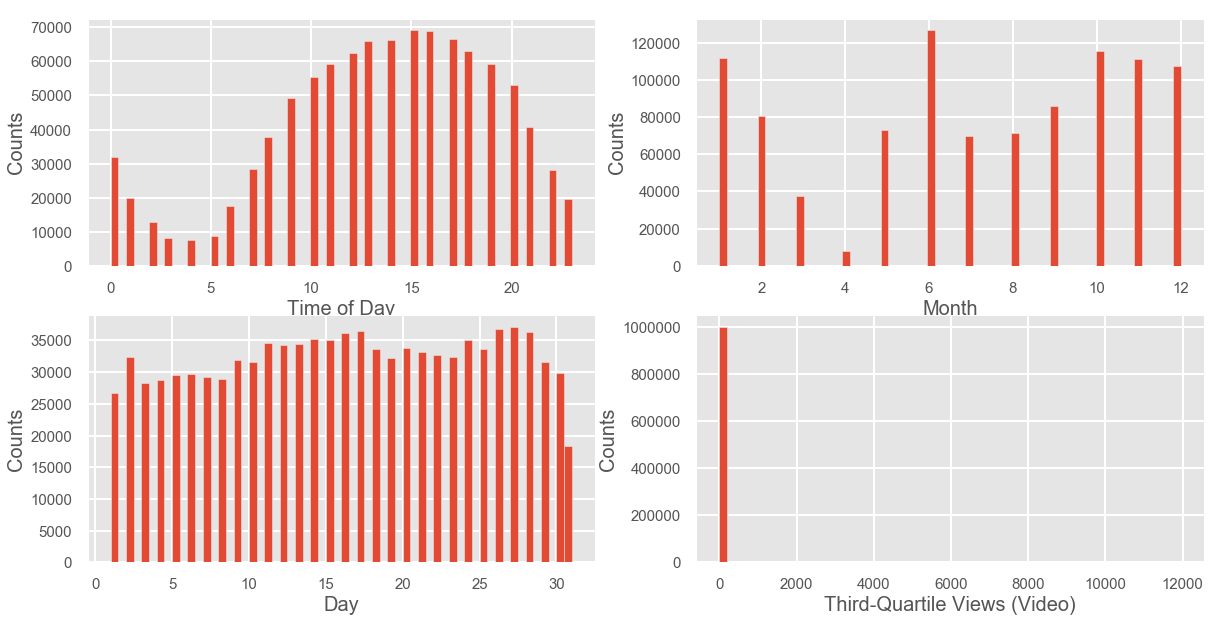

In [58]:
#Setting up figure size
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# Specify the features of interest
num_features = ['Time of Day', 'Month', 'Day',
                'Third-Quartile Views (Video)']
xaxes = num_features
yaxes = ['Counts','Counts','Counts','Counts']

# draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(df[num_features[idx]].dropna(), bins=60)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)

What do the variables look like? For example, are they numerical or categorical data. If they are numerical, what are their distribution; if they are categorical, how many are they in different categories?
- Make **HISTOGRAMS FOR NUMERICAL VARIABLES** and **BARPLOTS FOR CATEGORICAL VARIABLES**. 
- Check for missing values for the variables by looking at the **count** row and comparing it to **data.shape**. 

In [59]:
my_df = df[['Revenue (Adv Currency)','Post-Click Conversions',
           'Post-View Conversions','Active View: Viewable Impressions',
           'Channel']]
my_df.head()

,Revenue (Adv Currency),Post-Click Conversions,Post-View Conversions,Active View: Viewable Impressions,Channel
Advertiser ID,,,,,
3384832,0.015509,0.0,0.0,2,D
3384832,0.006772,0.0,0.0,0,D
3384832,0.007226,0.0,0.0,1,D
3384832,0.011810,0.0,0.0,2,D
3384832,0.043227,0.0,0.0,6,D


# Further EDA 
## Trends in Regions of Most Post-Click/View Conversions
This is an example of an analysis of the "grouped-property" type. 

Questions I'm thinking about the regions. 
- Which region is currently has the most conversions?
- Better, based off data, what sort of conclusions/insights can I draw about the conversions of each region throughout **_time_**?

Thining what are the demographics of customers that convert. Thinking about some reasonable definitions what it could mean to have "post-view/click conversions". 

I think I can determine "post-click conversions" by region!

In [61]:
converted = df[df['Conversions']>=1]
dfr = converted['Region'].value_counts()

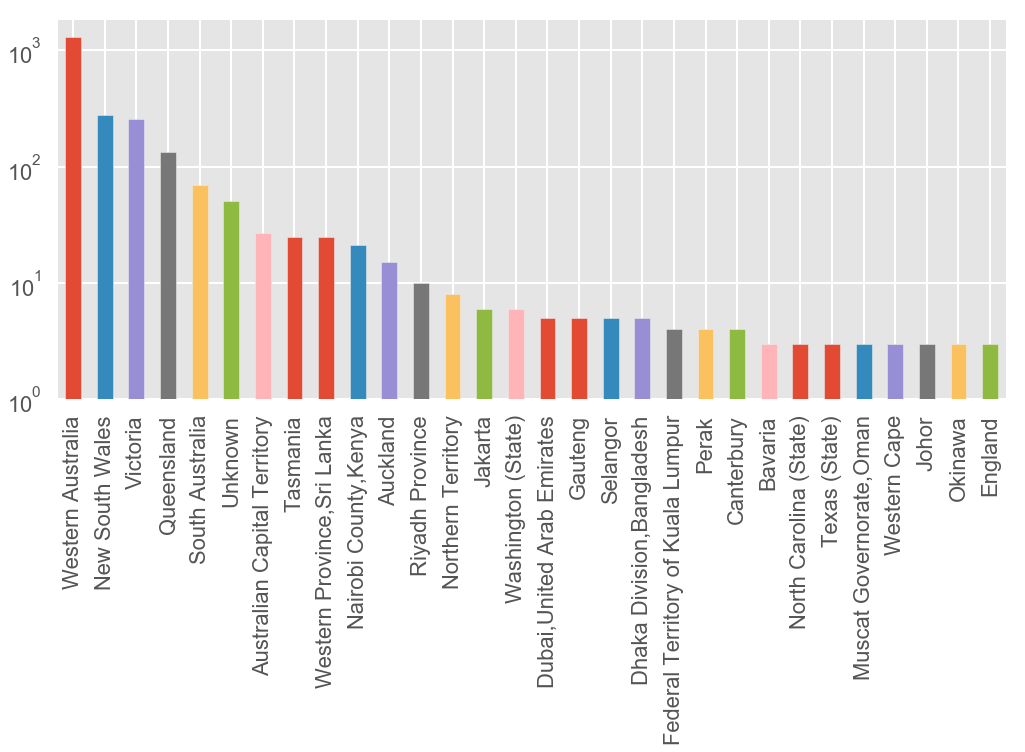

In [62]:
plt.figure(figsize=(17,7))
dfr.sort_values(ascending=False).iloc[0:30].plot(kind='bar',log=True)

### Visualising Region Conversions Through Time

In [63]:
region_wanted = dfr.index[dfr.values>5]
print(region_wanted.shape)
region_wanted

(13,)


Index(['Western Australia', 'New South Wales', 'Victoria', 'Queensland', 'South Australia', 'Unknown', 'Australian Capital Territory', 'Tasmania', 'Western Province,Sri Lanka', 'Nairobi County,Kenya', 'Auckland', 'Riyadh Province', 'Northern Territory'], dtype='object')

In [64]:
converted[converted['Region']=='Western Australia']['Day'].values

array([17, 15, 19, ..., 22, 28, 24])

/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: T

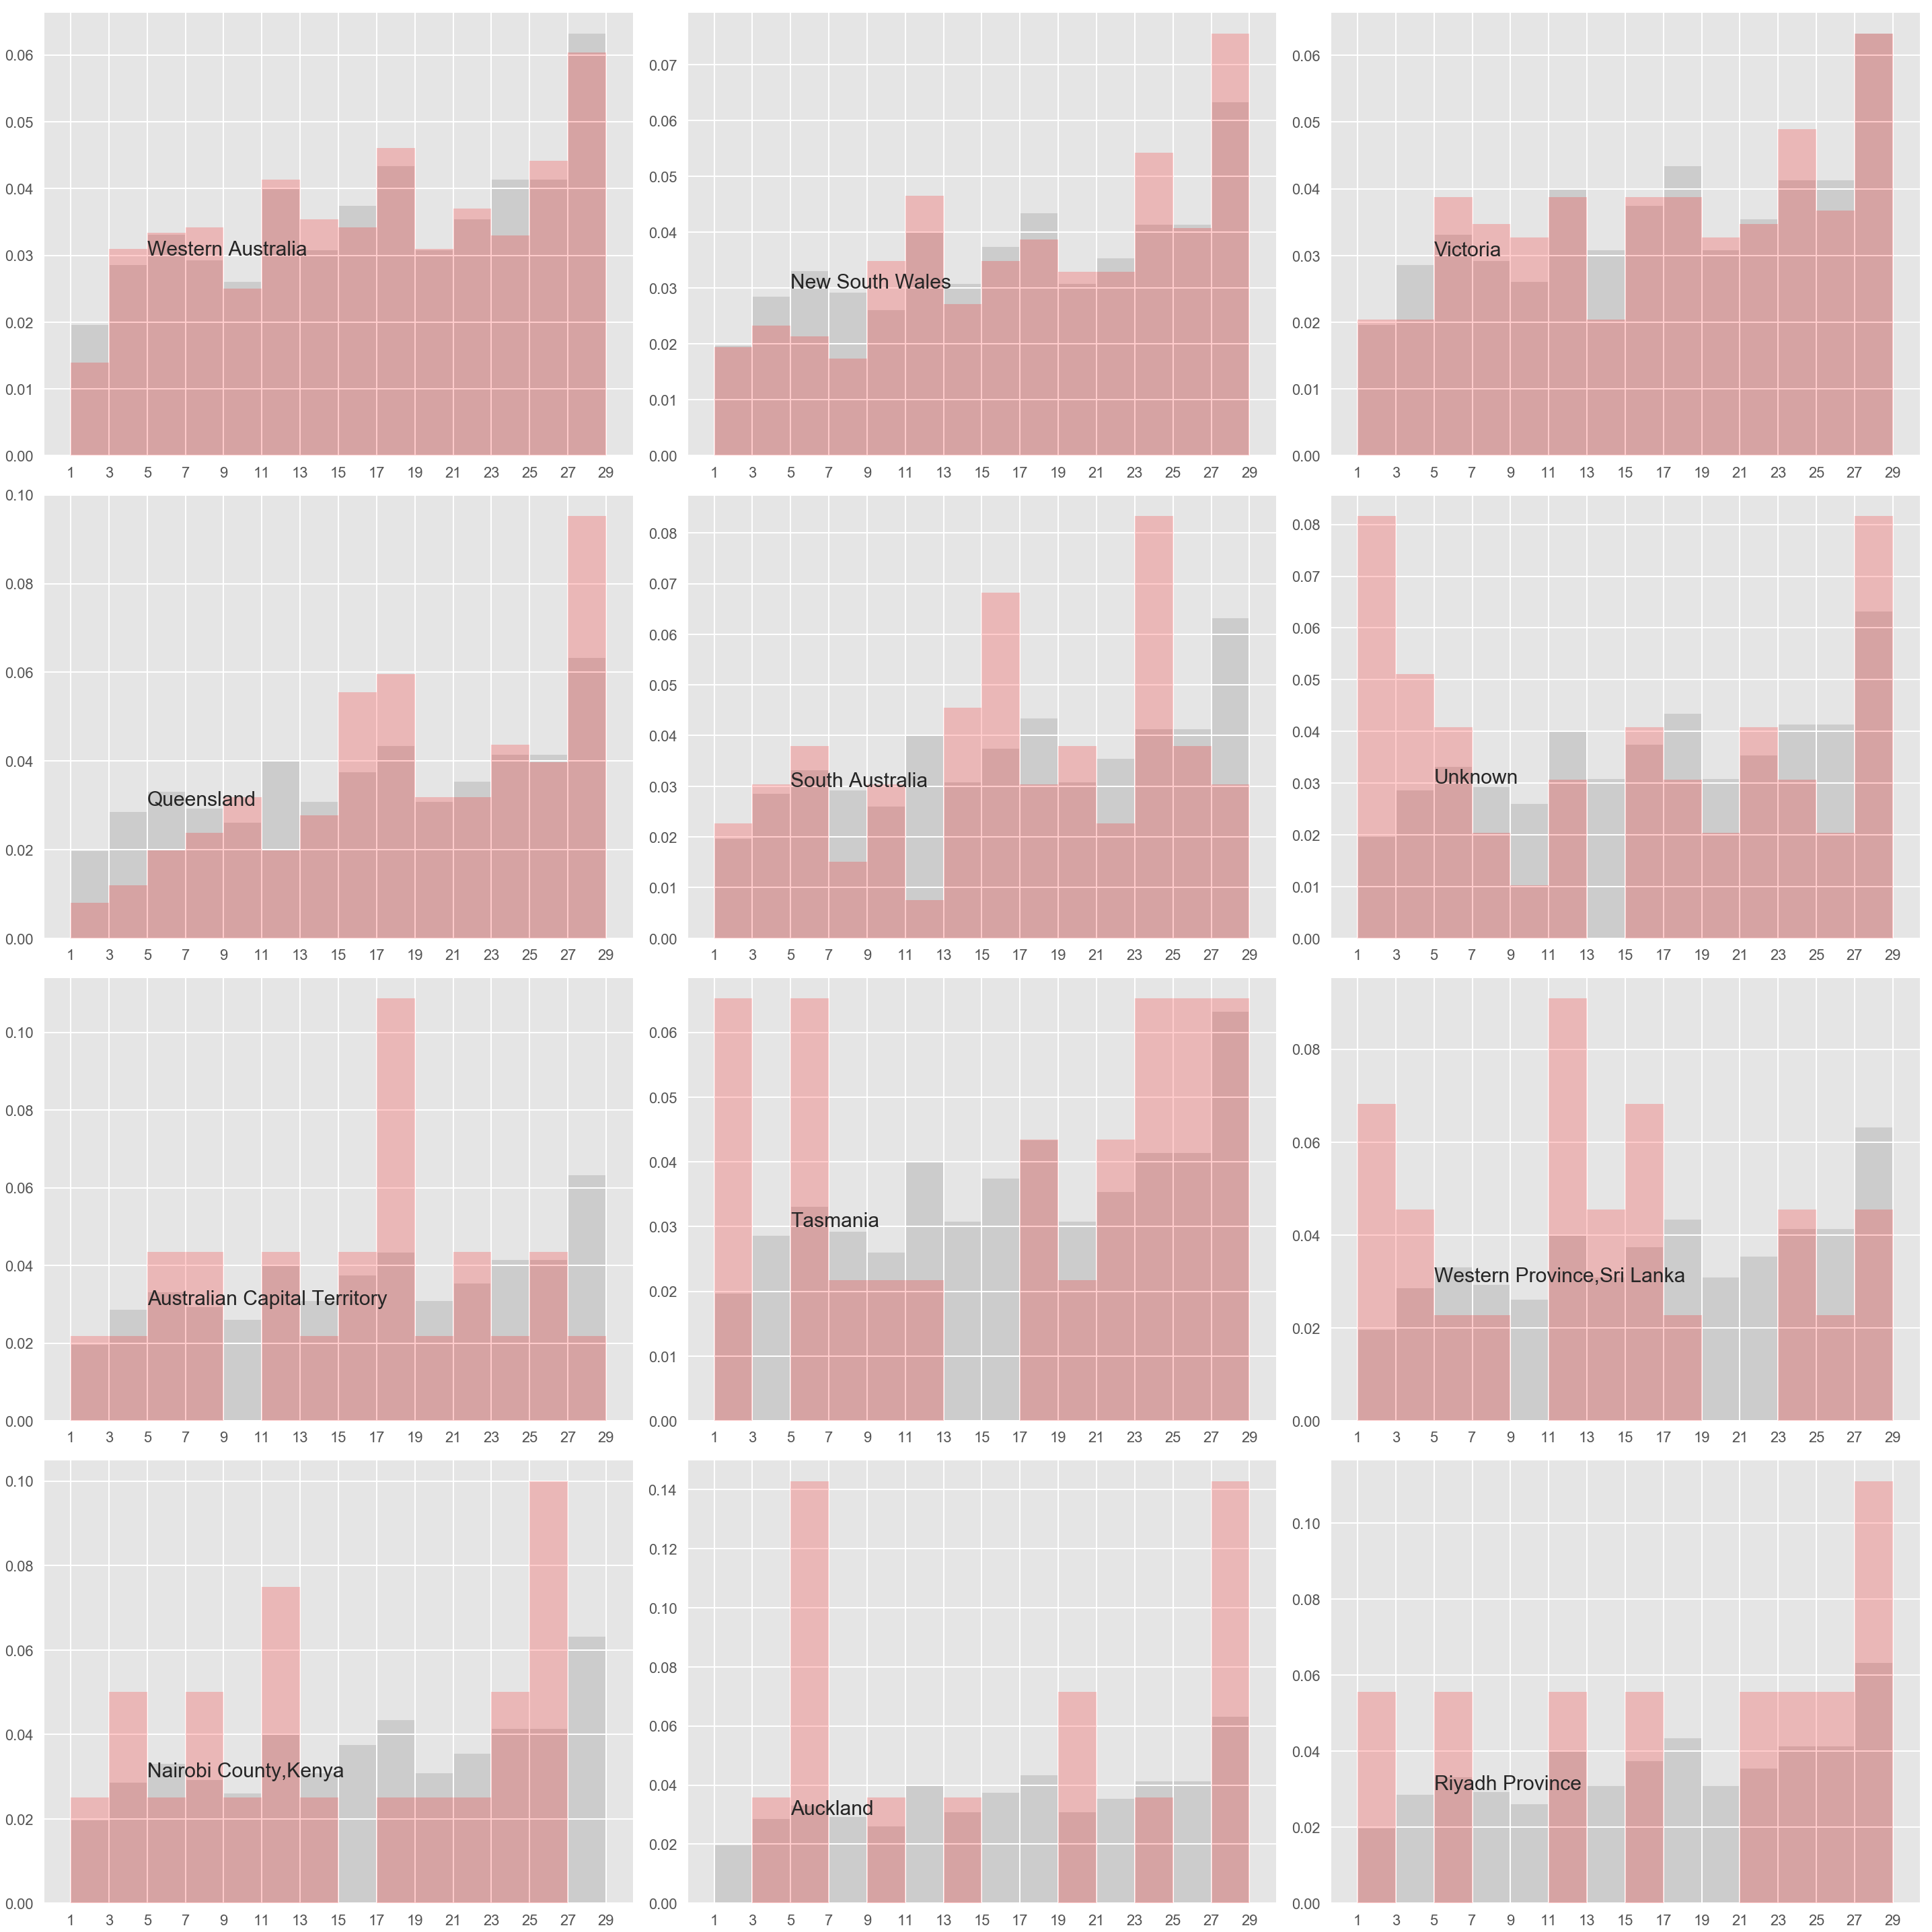

In [65]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(40, 40), 
                         tight_layout=True)
bins = np.arange(1, 31, 2)
for ax, region in zip(axes.ravel(), region_wanted):
    #Visualising through days
    ax.hist(converted[converted['Region'] == region]['Day'].values, 
            bins=bins, histtype='stepfilled', normed=True, color='r', alpha=.2, ec='none')
    ax.hist(converted['Day'], bins=bins, histtype='stepfilled', ec='None', normed=True, zorder=0, color='#cccccc')
    
    ax.annotate(region, xy=(5, 3e-2), fontsize=30)
    ax.xaxis.set_ticks(np.arange(1, 31, 2))

In [66]:
df['Region'].value_counts()

New South Wales                        225810
Western Australia                      218833
Victoria                               202364
Queensland                             109971
South Australia                         67581
Auckland                                19778
Unknown                                 16139
Australian Capital Territory            11938
Jakarta                                 11580
Western Province,Sri Lanka               9108
Federal Territory of Kuala Lumpur        8599
Tasmania                                 8362
Wellington                               7542
Nairobi County,Kenya                     5449
Waikato                                  5088
Metro Manila                             5058
England                                  4915
Northern Territory                       4097
Western Cape                             3983
Riyadh Province                          3972
Canterbury                               3042
Gauteng                           

## SIDE BRANCH

In [15]:
dataset = df[['Creative Type',
              'Creative Height','Creative Width',
             'Time of Day','Device Type',
             'DV360 Activity','Exchange','Impressions','Revenue (Adv Currency)',
             'Layer','Channel','Month','Conversions']]
dataset.head()

,Creative Type,Creative Height,Creative Width,Time of Day,Device Type,DV360 Activity,Exchange,Impressions,Revenue (Adv Currency),Layer,Channel,Month,Conversions
Advertiser ID,,,,,,,,,,,,,
3384832,Standard,250.0,300.0,16,Desktop,Total,PubMatic,4,0.015509,AW,D,10,0.0
3384832,Standard,250.0,300.0,16,Desktop,Total,Rubicon,1,0.006772,AW,D,10,0.0
3384832,Standard,250.0,300.0,17,Desktop,Total,DoubleClick Ad Exchange,1,0.007226,AW,D,10,0.0
3384832,Standard,250.0,300.0,17,Desktop,Total,DoubleClick Ad Exchange,2,0.011810,AW,D,10,0.0
3384832,Standard,250.0,300.0,17,Desktop,Total,DoubleClick Ad Exchange,8,0.043227,AW,D,10,0.0


In [16]:
dataset_X = dataset[dataset.columns[0:12]]
dataset_Y = dataset['Conversions']
#Separating target variables from the others

In [17]:
#Converting independent categorical variales into numerical by creating dummy variables
dataset_X_dummy = pd.get_dummies(dataset_X)
dataset_X_dummy.head()
print(len(dataset_X_dummy.columns))

98


### Feature Selection with PCA

#### PCA and Proportion of Variance Explained
In case of PCA, "variance" means summative variance or multivariate variability or overall variability or total variability. Below is the covariance matrix of some 3 variables. Their variances are on the diagonal, and the sum of the 3 values (3.448) is the overall variability.

>   1.343730519   -.160152268    .186470243 


>   -.160152268    .619205620   -.126684273


>    .186470243   -.126684273   1.485549631

Now, PCA replaces original variables with new variables, called principal components, which are orthogonal (i.e. they have zero covariations) and have variances (called eigenvalues) in decreasing order. So, the covariance matrix between the principal components extracted from the above data is this:

>   1.651354285    .000000000    .000000000 


>    .000000000   1.220288343    .000000000 


>    .000000000    .000000000    .576843142

Note that the diagonal sum is still 3.448, which says that all 3 components account for all the multivariate variability. The 1st principal component accounts for or "explains" 1.651/3.448 = 47.9% of the overall variability; the 2nd one explains 1.220/3.448 = 35.4% of it; the 3rd one explains .577/3.448 = 16.7% of it.

So, what do they mean when they say that "PCA maximizes variance" or "PCA explains maximal variance"? That is not, of course, that it finds the largest variance among three values 1.343730519 .619205620 1.485549631, no. PCA finds, in the data space, the dimension (direction) with the largest variance out of the overall variance 1.343730519+.619205620+1.485549631 = 3.448. That largest variance would be 1.651354285. Then it finds the dimension of the second largest variance, orthogonal to the first one, out of the remaining 3.448-1.651354285 overall variance. That 2nd dimension would be 1.220288343 variance. And so on. The last remaining dimension is .576843142 variance. See also "Pt3" here and the great answer here explaining how it done in more detail.

Mathematically, PCA is performed via linear algebra functions called eigen-decomposition or svd-decomposition. These functions will return you all the eigenvalues 1.651354285 1.220288343 .576843142 (and corresponding eigenvectors) at once 

In [18]:
#Converting dataframe into numpy array
X = dataset_X_dummy.values
y = dataset_Y.values

#Split-out validation dataset
validation_size = 0.20
seed = 7 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=validation_size,
                                                 random_state=seed)

In [19]:
#Scaling the values 
X_scaled = scale(X_train)

In [20]:
#Initially, lets create 98 components which is the actual number of variables I have
pca = PCA(n_components = 98)
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=98, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [21]:
#The amount of variance that each principal component explains
var = pca.explained_variance_ratio_


In [22]:
#Cumulative Variance Plot
var1 = np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100)

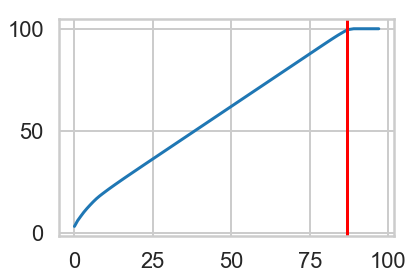

In [23]:
#Lets see Cumulative Variance plot 
plt.plot(var1)

#Looking at the plot, you can see how many components are explained by 100%
#variability of the actual data. 
#Thus proceed with only those components for further modelling 
plt.axvline(x=87,color='red')

**Proceeding with only 87 variables for further modelling**

In [24]:
pca = PCA(n_components =87)
pca.fit(X_scaled)
X_train_PC =pca.fit_transform(X_scaled)

## Model Training 

In [30]:
seed = 7 
scoring = 'accuracy'
#Test options and evaluation metric 

In [27]:
#Spot check Algorithsm 
#models = []
from sklearn import model_selection
#models.append(('LR',LogisticRegression()))
#models.append(("LDA",LinearDiscriminantAnalysis()))
#models.append(("KNN",KNeighborsClassifier()))
#models.append(("CART",DecisionTreeClassifier()))
#models.append(("NB",GaussianNB))
#models.append(("SVM",SVC()))

#model = SVC()

In [ ]:
#evaluating each model in turn 
results = []
names = []
for name,model in models: 
    kfold = model_selection.KFold(n_splits=10,random_state=seed)
    cv_results = model_selection.cross_val_score(model,X_train_PC,y_train,
                                               cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" & (name, cv_results.mean())
    print(msg)